<a href="https://colab.research.google.com/github/cristiandalmaso2/MetodologiaInvestigacion2021/blob/main/NLP_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicción del precio del Bitcoin usando NLP

## Instalar y cargar librerías

In [ ]:
pip install OpenBlender

     |████████████████████████████████| 61kB 2.3MB/s 
     |████████████████████████████████| 256kB 5.2MB/s 
  Created wheel for OpenBlender: filename=OpenBlender-2.9-cp37-none-any.whl size=6561 sha256=92f96b572db888f1e26413f0eeb1a1f0e7727a37f2789c522f761723bd312ca3
  Stored in directory: /root/.cache/pip/wheels/f6/34/de/fd9cf58fca4c0530f1e9b313b5638ab3d28a66f3080a55946e
Successfully built OpenBlender


In [ ]:
import pandas as pd
import numpy as np
import OpenBlender
import json
import matplotlib.pyplot as plt

## Obtener los datos históricos del bitcoin

In [ ]:
token = '60b690829516291fe98257255sfBVoJ7MEjjfytjEuzDLsNiKIknjE'                #Genero el API token en OpenBlender 
action = 'API_getObservationsFromDataset'

# ANCHOR: 'Bitcoin vs USD'
  
parameters = { 
    'token' : token,
    'id_dataset' : '5d4c3af79516290b01c83f51',
    'date_filter':{"start_date" : "2020-01-01",
                   "end_date" : "2020-12-31"} 
} 

df = pd.read_json(json.dumps(OpenBlender.call(action, parameters)['sample']), convert_dates=False, convert_axes=False).sort_values('timestamp', ascending=False)

df.reset_index(drop=True, inplace=True)
df['date'] = [OpenBlender.unixToDate(ts, timezone = 'GMT') for ts in df.timestamp]
df = df.drop('timestamp', axis = 1)

Task ID: '60b697990895fafb4a9d8d4b'.
Total estimated consumption: 500.03 processing units.
Task confirmed. Starting download..
100.0 % completed.


In [ ]:
df.shape

(336, 7)

In [ ]:
df.head()

,volume,price,high,low,open,change,date
0,10.51K,28880.0,28892.0,27316.0,27316.0,5.73%,30-12-2020 17:00:00
1,8.92K,27315.0,27315.0,25923.0,27058.0,0.95%,29-12-2020 17:00:00
2,7.60K,27058.0,27308.0,26241.0,26241.0,3.11%,28-12-2020 17:00:00
3,17.96K,26241.0,28051.1,26241.0,26410.0,-0.65%,27-12-2020 17:00:00
4,13.15K,26412.0,26577.0,24566.0,24717.0,6.86%,26-12-2020 17:00:00


## Definir y entender la variable objetivo

In [ ]:
df["log_diff"] = np.log(df["price"]) - np.log(df["open"]) #rendimiento logarítmico, nueva columna.

In [ ]:
df

,volume,price,high,low,open,change,date,log_diff
0,10.51K,28880.0,28892.0,27316.0,27316.0,5.73%,30-12-2020 17:00:00,0.055677
1,8.92K,27315.0,27315.0,25923.0,27058.0,0.95%,29-12-2020 17:00:00,0.009453
2,7.60K,27058.0,27308.0,26241.0,26241.0,3.11%,28-12-2020 17:00:00,0.030660
3,17.96K,26241.0,28051.1,26241.0,26410.0,-0.65%,27-12-2020 17:00:00,-0.006420
4,13.15K,26412.0,26577.0,24566.0,24717.0,6.86%,26-12-2020 17:00:00,0.066327
...,...,...,...,...,...,...,...,...
331,4.45K,7364.6,7509.9,7315.8,7370.3,-0.07%,05-01-2020 17:00:00,-0.000774
332,4.27K,7369.8,7422.0,7297.7,7371.8,0.03%,04-01-2020 17:00:00,-0.000271
333,6.68K,7367.5,7437.6,6909.3,6989.4,5.41%,03-01-2020 17:00:00,0.052684
334,4.85K,6989.4,7225.2,6963.0,7212.7,-3.10%,02-01-2020 17:00:00,-0.031449


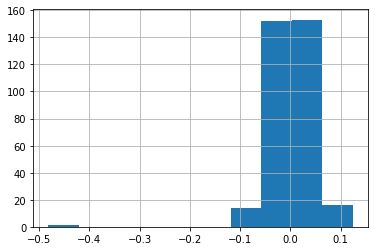

In [ ]:
df["log_diff"].hist()
plt.show()

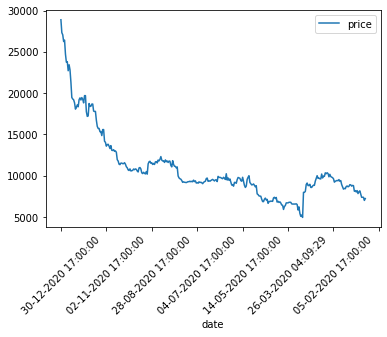

In [ ]:
df.plot(x = "date",
        y = "price",
        kind = "line",
        rot = 45)
plt.show()

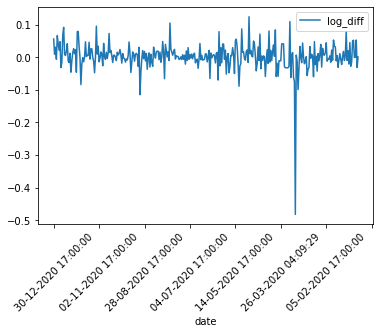

In [ ]:
df.plot(x = "date",
        y = "log_diff",
        kind = "line",
        rot = 45)
plt.show()

In [ ]:
df['target'] = [1 if log_diff > 0 else 0 for log_diff in df['log_diff']]
df

,volume,price,high,low,open,change,date,log_diff,target
0,10.51K,28880.0,28892.0,27316.0,27316.0,5.73%,30-12-2020 17:00:00,0.055677,1
1,8.92K,27315.0,27315.0,25923.0,27058.0,0.95%,29-12-2020 17:00:00,0.009453,1
2,7.60K,27058.0,27308.0,26241.0,26241.0,3.11%,28-12-2020 17:00:00,0.030660,1
3,17.96K,26241.0,28051.1,26241.0,26410.0,-0.65%,27-12-2020 17:00:00,-0.006420,0
4,13.15K,26412.0,26577.0,24566.0,24717.0,6.86%,26-12-2020 17:00:00,0.066327,1
...,...,...,...,...,...,...,...,...,...
331,4.45K,7364.6,7509.9,7315.8,7370.3,-0.07%,05-01-2020 17:00:00,-0.000774,0
332,4.27K,7369.8,7422.0,7297.7,7371.8,0.03%,04-01-2020 17:00:00,-0.000271,0
333,6.68K,7367.5,7437.6,6909.3,6989.4,5.41%,03-01-2020 17:00:00,0.052684,1
334,4.85K,6989.4,7225.2,6963.0,7212.7,-3.10%,02-01-2020 17:00:00,-0.031449,0


In [ ]:
format = '%d-%m-%Y %H:%M:%S'
timezone = 'GMT'
df['u_timestamp'] = OpenBlender.dateToUnix(df['date'], 
                                           date_format = format, 
                                           timezone = timezone)
df = df[['date', 'timestamp', 'price', 'target']]
df.head()


KeyError: ignored

In [ ]:
search_keyword = 'bitcoin'
df = df.sort_values('timestamp').reset_index(drop = True)
print('From : ' + OpenBlender.unixToDate(min(df.timestamp)))
print('Until: ' + OpenBlender.unixToDate(max(df.timestamp)))
OpenBlender.searchTimeBlends(token,
                             df.timestamp,
                             search_keyword)


In [ ]:
blend_source = {
                'id_dataset':'5ea2039095162936337156c9',
                'feature' : 'text'
            }

# Now, let's 'timeBlend' it to our dataset
df_blend = OpenBlender.timeBlend( token = token,
                                  anchor_ts = df.timestamp,
                                  blend_source = blend_source,
                                  blend_type = 'agg_in_intervals',
                                  interval_size = 60 * 60 * 24,
                                  direction = 'time_prior',
                                  interval_output = 'list',
                                  missing_values = 'raw')
df = pd.concat([df, df_blend.loc[:, df_blend.columns != 'timestamp']], axis = 1)
df.head()


In [ ]:
positive_filter = {'name' : 'positive', 
                   'match_ngrams': ['positive', 'buy', 
                                    'bull', 'boost']}
blend_source = {
                'id_dataset':'5ea2039095162936337156c9',
                'feature' : 'text',
                'filter_text' : positive_filter
            }
df_blend = OpenBlender.timeBlend( token = token,
                                  anchor_ts = df.timestamp,
                                  blend_source = blend_source,
                                  blend_type = 'agg_in_intervals',
                                  interval_size = 60 * 60 * 24,
                                  direction = 'time_prior',
                                  interval_output = 'list',
                                  missing_values = 'raw')
df = pd.concat([df, df_blend.loc[:, df_blend.columns != 'timestamp']], axis = 1)

# And now the negatives
negative_filter = {'name' : 'negative', 
                   'match_ngrams': ['negative', 'loss', 'drop', 'plummet', 'sell', 'fundraising']}
blend_source = {
                'id_dataset':'5ea2039095162936337156c9',
                'feature' : 'text',
                'filter_text' : negative_filter
            }
df_blend = OpenBlender.timeBlend( token = token,
                                  anchor_ts = df.timestamp,
                                  blend_source = blend_source,
                                  blend_type = 'agg_in_intervals', #closest_observation
                                  interval_size = 60 * 60 * 24,
                                  direction = 'time_prior',
                                  interval_output = 'list',
                                  missing_values = 'raw')
df = pd.concat([df, df_blend.loc[:, df_blend.columns != 'timestamp']], axis = 1)


In [ ]:
features = ['target', 'BITCOIN_NE.text_COUNT_last1days:positive', 'BITCOIN_NE.text_COUNT_last1days:negative']
df_anchor[features].corr()['target']

In [ ]:
# BTC Text Vectorizer
blend_source = { 
                'id_textVectorizer':'5f739fe7951629649472e167'
               }
df_blend = OpenBlender.timeBlend( token = token,
                                  anchor_ts = df_anchor.timestamp,
                                  blend_source = blend_source,
                                  blend_type = 'agg_in_intervals',
                                  interval_size = 60 * 60 * 24,
                                  direction = 'time_prior',
                                  interval_output = 'list',
                                  missing_values = 'raw') .add_prefix('VEC.')
df_anchor = pd.concat([df_anchor, df_blend.loc[:, df_blend.columns != 'timestamp']], axis = 1)
df_anchor.head()

## Aplicar ML y Vista resultados

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
# We drop correlated features because with so many binary 
# ngram variables there's a lot of noise
corr_matrix = df_anchor.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
df_anchor.drop([column for column in upper.columns if any(upper[column] > 0.5)], axis=1, inplace=True)